In [6]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-precond-gmres)

Here is a random nonsymmetric matrix.

In [7]:
n = 8000;
A = speye(n) + sprand(n, n, 0.00035);

Without a preconditioner, restarted GMRES makes slow progress.

In [8]:
b = rand(n, 1);
[x, ~, ~, ~, resid_plain] = gmres(A, b, 50, 1e-10, 3);  % restart at 50
format short e
resid_plain(1:30:end)

ans = 6×1 double
   5.2049e+01
   3.2464e+00
   1.1154e+00
   2.8557e-01
   6.4053e-02
   1.3367e-02

```{index} ! MATLAB; ilu
```

This version of incomplete LU factorization simply prohibits fill-in for the factors, freezing the sparsity pattern of the approximate factors to match the original matrix.

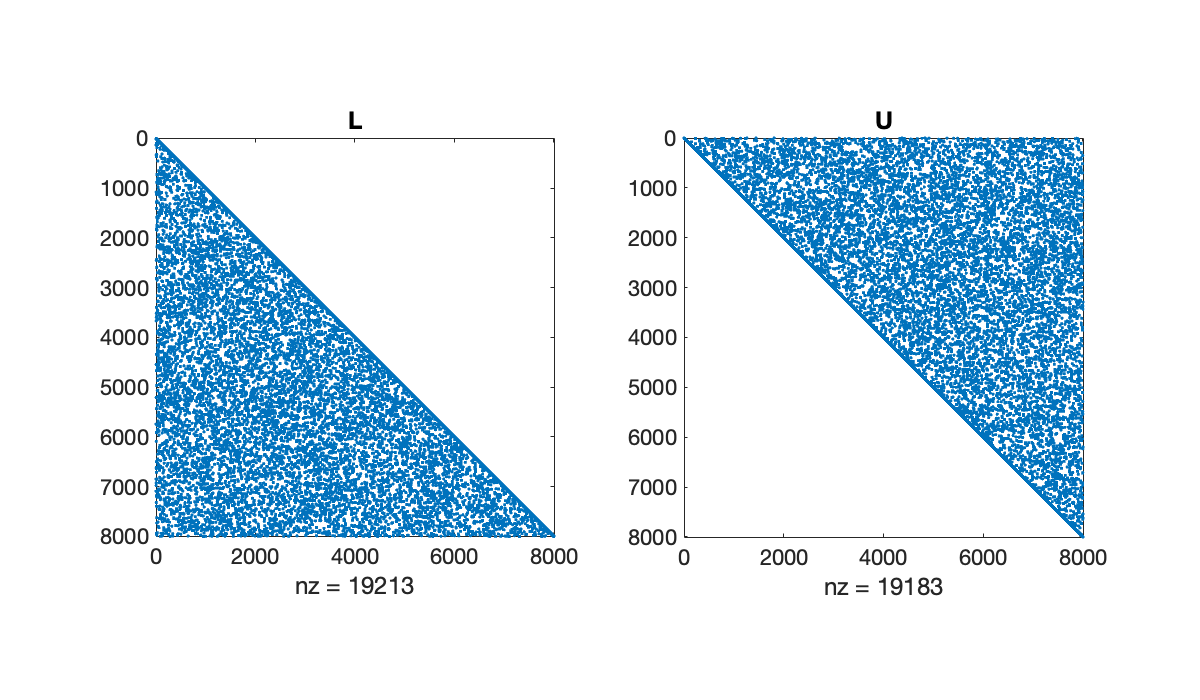

There are 30396 nonzeros in A


In [9]:
[L, U] = ilu(A);
clf
subplot(121), spy(L)
title('L')
subplot(122), spy(U)
title('U')
disp(sprintf("There are %d nonzeros in A", nnz(A)))

It does _not_ produce a true factorization of $\mathbf{A}$.

In [10]:
normest(A - L * U) 

ans = 
   3.1242e+00

The actual preconditioning matrix is $\mathbf{M}=\mathbf{L}\mathbf{U}$. However, the `gmres` function allows setting the preconditioner by giving the factors independently.

In [11]:
[x, ~, ~, ~, resid_prec] = gmres(A, b, [], 1e-10, 300, L, U);

The preconditioner makes a significant difference in the number of iterations needed.

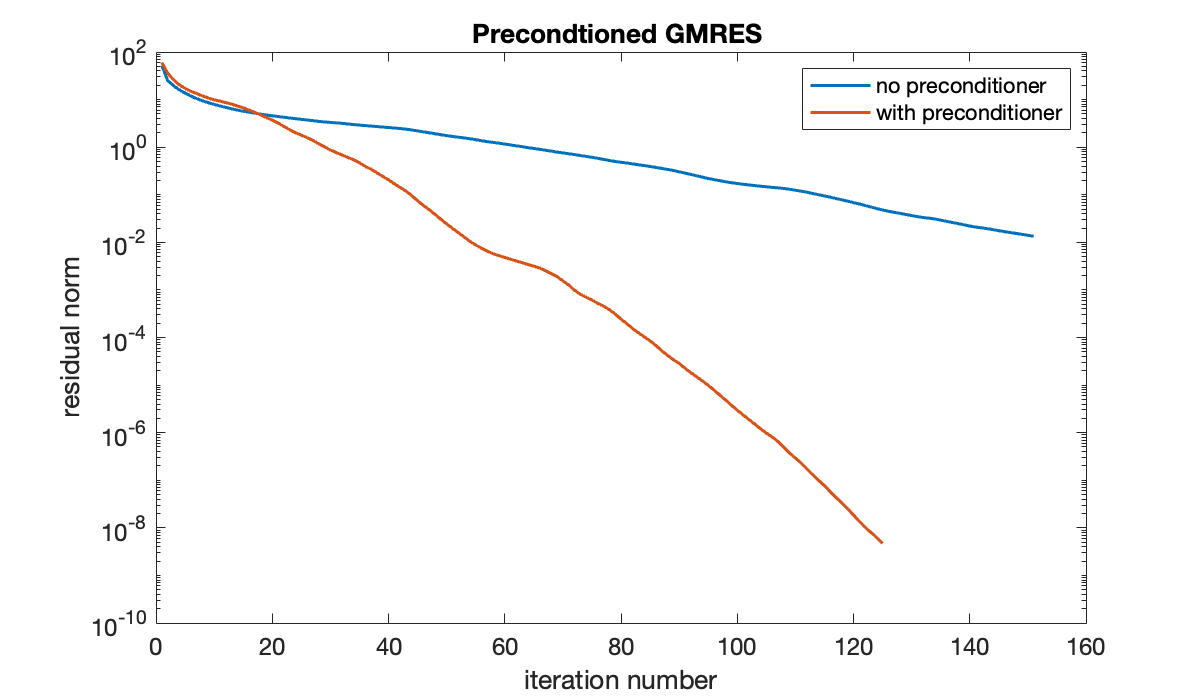

In [12]:
clf, semilogy(resid_plain)
hold on, semilogy(resid_prec)
xlabel('iteration number'), ylabel('residual norm')
title('Precondtioned GMRES ')
legend('no preconditioner', 'with preconditioner');

```